In [1]:
import sys
sys.path.append('../../')

import matplotlib.pyplot as plt
import estraces
import scared
from kresca.plot import CurvePlot
from kresca.reverse import LeakageAssessment

## Import Traces

In [2]:
ths = estraces.read_ths_from_ets_file('../../Traces/TinyAES_1k.ets')

In [3]:
print(ths)

Trace Header Set:
Name.............: ETS Format THS
Reader...........: ETS format reader of file ../../Traces/TinyAES_1k.ets with 1000 traces.
ciphertext.......: uint8
key..............: uint8
plaintext........: uint8



## Plot Traces

### kresca

C:\Users\Tes\miniconda3\envs\SCA\lib\site-packages\ipywidgets\widgets\widget.py:528: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)


RFBOutputContext()

CanvasBackend(css_height='500px', css_width='950px')
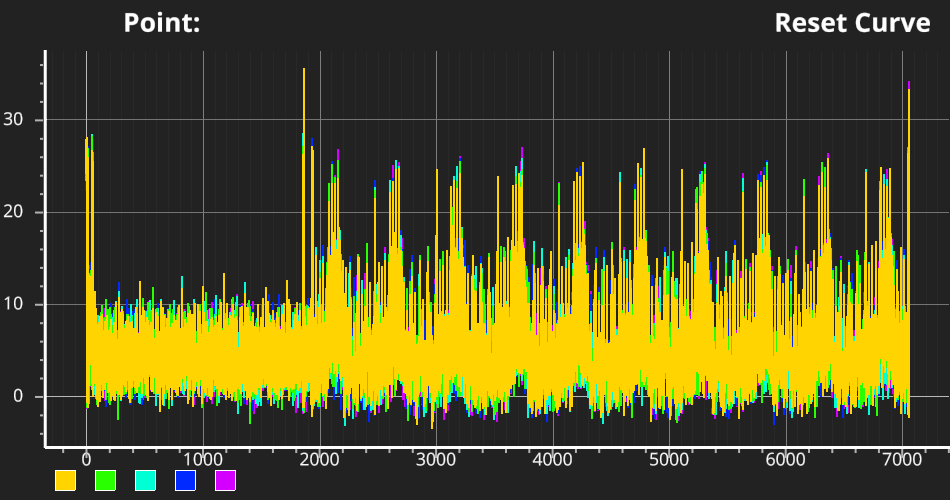

In [4]:
#put inline=True if you want to display on notebook
CurvePlot(ths.samples[:5], inline=True) 

### AES Full

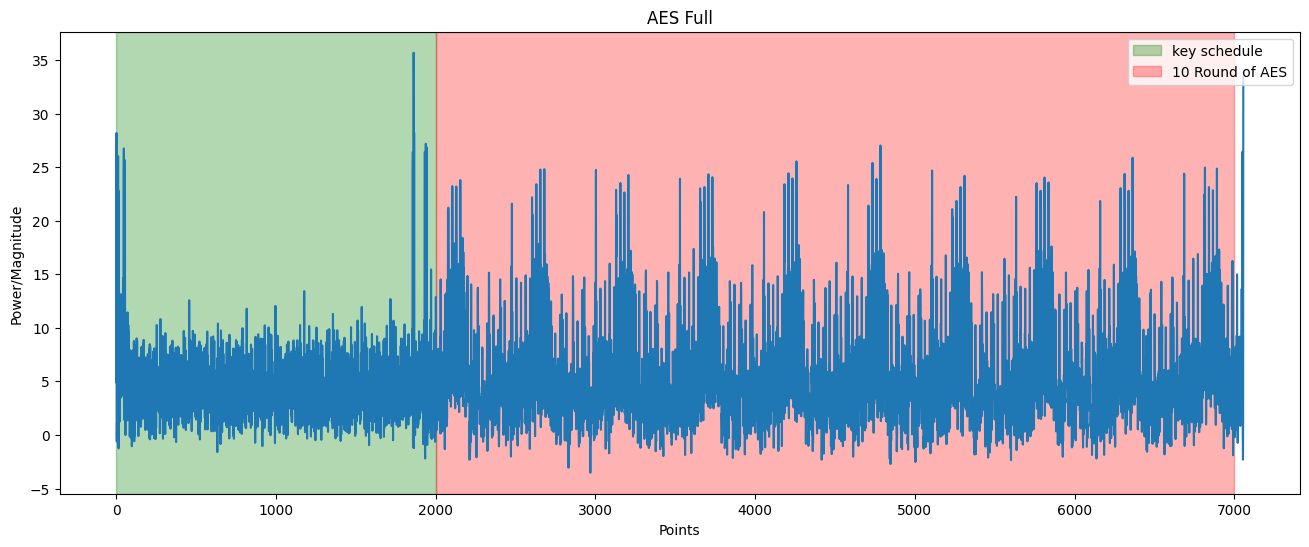

In [5]:
plt.figure(figsize=(16, 6))
plt.plot(ths.samples[0])
plt.xlabel('Points')
plt.ylabel('Power/Magnitude')
plt.title('AES Full')

plt.axvspan(0, 2000, color='green', alpha=0.3, label='key schedule')
plt.axvspan(2000, 7000, color='red', alpha=0.3, label='10 Round of AES')
plt.legend(loc='upper right')
plt.show()

### 1 Round of AES

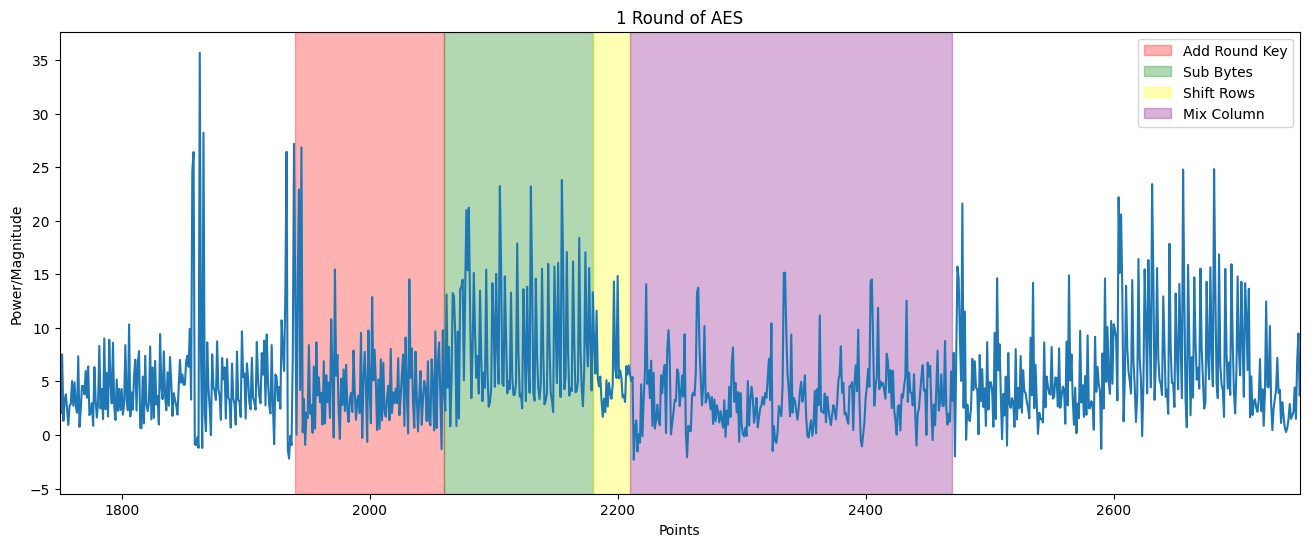

In [6]:
plt.figure(figsize=(16, 6))
plt.plot(ths.samples[0])
plt.xlabel('Points')
plt.ylabel('Power/Magnitude')
plt.xlim(1750, 2750)
plt.title('1 Round of AES')

plt.axvspan(1940, 2060, color='red', alpha=0.3, label='Add Round Key')
plt.axvspan(2060, 2180, color='green', alpha=0.3, label='Sub Bytes')
plt.axvspan(2180, 2210, color='yellow', alpha=0.3, label='Shift Rows')
plt.axvspan(2210, 2470, color='purple', alpha=0.3, label='Mix Column')
plt.legend(loc='upper right')
plt.show()